<a href="https://colab.research.google.com/github/thedreadpersephone/data-and-python/blob/main/Copy_of_P_01a_Movies_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini Project


---





## Define the Problem



---



### The Problem

Movies vary in popularity and a high-ranking film typically generates greater revenues and success for those involved.

What factors affect a movie's ranking and are rankings generally increasing or decreasing over time?

The Internet Movie Database (IMDB) collects information on films, including actors and production crew involved, the genre, year and rank. We can use this dataset to try and answer our question.

If we are able to identify factors that high ranking movies have in common, we could predict which movies will be successful, based on this data.

## Collect the Data


---

### Data Collection

The [CTU Relational Dataset Repository](https://relational.fel.cvut.cz/) contains numerous SQL databases that can be queried, including one for The IMDB.

Because there are thousands of people involved in the making of an individual movie, we will focus our analysis solely on the directors rather than the entire production team. We will also need to gather data on the genre, year and rank.

In a separate notebook, we have queried the database for the relevant data, which has been converted into a single CSV file.

Below, we import the packages required for this analysis, load the data and view the first five rows.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/thedreadpersephone/data-and-python/refs/heads/main/movies.csv"
db = pd.read_csv(url)
db.head()



,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


## Clean and Transform


---



### Clean the Data

In order to clean the data, we will investigate the data in each column and decide what actions need to be taken.

We will also look at the dataset as a whole to determine how to deal with missing or incomplete data.



---


#Missing rank values
As can be seen below, we have investigated the database and can immediately see that there are null values in the database and that the non-null count in the rank column is less than the total entries. This means that many films do not have a rank. As rank is essential to the question we are asking of the data, we will not be able to use any rows without rank values. Therefore these rows have been dropped from the dataset. After this we can see that the number of entries has reduced. All other columns appear to have complete data.



---





In [ ]:
def check_null():
  db.info()
  # displays the info about the database
  null = db.isnull().values.any()
  #checks if any NA values exist in the dataframe
  return null
check_null()

def drop_null():
  cleaned_db = db.dropna(subset=["rank"])
  #removes the rows with null values for the column, to specify a column or columns I need to use subset =
  cleaned_db.info()
  #now we compare the information to see what has changed after dropping rows
  return cleaned_db
cleaned_db = drop_null()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   ge

### Feature Extraction

We have each director's first and last name in a separate column. It would be preferable to have one column for fullname. Therefore, we will combine them into one column and drop first and last name.

In [ ]:
def combine_columns():
  cleaned_db['FullName'] = cleaned_db['first_name'] + ' ' + cleaned_db['last_name']
  #combines the 2 columns into 1 new column
  cols_to_drop = ['first_name', 'last_name']
  combined_db = cleaned_db.drop(columns=cols_to_drop)
  #drops the unwanted columns
  print(combined_db.head())
  combined_db.to_csv('movies_cleaned.csv')
  return combined_db
combined_db = combine_columns()

    Unnamed: 0             name  year  rank        genre         FullName
77          77     Cleaning Up!  2002   8.3  Documentary  Rostislav Aalto
78          78         Is meidn  1993   6.8        Drama  Veikko Aaltonen
79          79  Juoksuhaudantie  2004   6.3       Comedy  Veikko Aaltonen
80          80  Juoksuhaudantie  2004   6.3        Drama  Veikko Aaltonen
81          81              Maa  2001   6.0  Documentary  Veikko Aaltonen




Because the data is already in long format, which is the most appropriate for analysing using visualisation software, we do not need to reshape it. However, we will either need to reshape it or drop duplicate values when investigating the data in Python or Excel.

## Analyse


---



### Summary Statistics

To get an understanding of the dataset as a whole, we will look at the summary statistics of the numeric columns and find out about more about the categorical values.

In [ ]:
def explore_data():
  print(combined_db.describe())
  #describes the numerical data
  print(combined_db.describe(exclude=[np.number]))
  #describes the categorical data
explore_data()



          Unnamed: 0           year           rank
count  113376.000000  113376.000000  113376.000000
mean   184806.412583    1975.102764       5.995124
std    106369.286163      24.166500       1.540330
min        77.000000    1892.000000       1.000000
25%     95164.250000    1955.000000       5.100000
50%    182475.500000    1981.000000       6.200000
75%    277251.250000    1997.000000       7.100000
max    368891.000000    2004.000000       9.900000
                         name   genre      FullName
count                  113376  113376        113376
unique                  55954      20         22104
top     Scnario sur la drogue   Drama  Friz Freleng
freq                       75   24696          1025


### Investigating Rank

Our first visualisation is on the rank data, which we have summarised using a histogram.

---

The histogram shows that most films are ranked between 5 and 7, with fewer films ranked at the very low or high extremes.




---

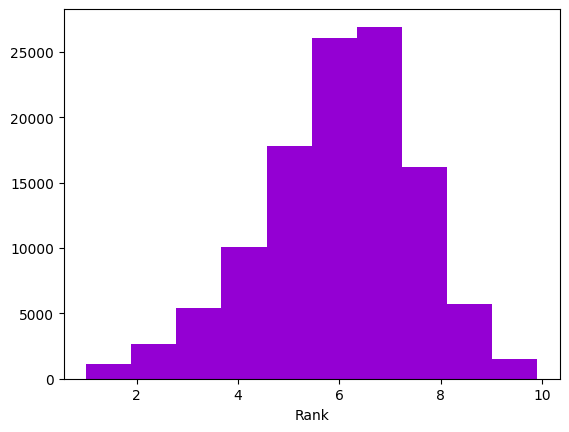

In [ ]:
def plot_histogram():
  cols_to_keep = ["rank"]
  #creates a list of columns to keep
  data = combined_db[cols_to_keep]
  #filters the columns to keep
  plt.hist(data)
  #plots the histogram
  plt.xlabel("Rank")
  #adds labels to the axes
  plt.hist(data, color="darkviolet")
  #changes the colour of the bars
  plt.show()
plot_histogram()


### Investigating Genre

Our next visualisation is on the genre data, for which we have used a bar chart to show the freqency of each category.


---


The bar graph shows that drama is the most frequently occurring genre, followed by comedy. On the other hand, film noir and music are the two least frequently occurring genres.


---

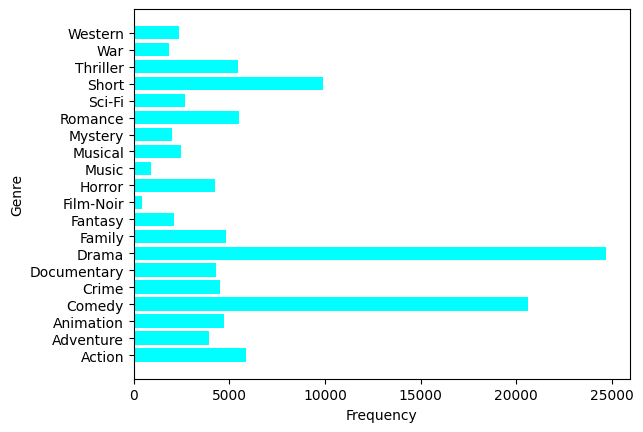

In [ ]:
def plot_bar():
  grouped_data = combined_db.groupby(by='genre').size()
  labels = grouped_data.keys()
  x = labels
  y = grouped_data
  plt.barh(x, y, color='aqua')
  plt.xlabel("Frequency")
  plt.ylabel("Genre")
  plt.show()
plot_bar()



### Investigating the relationship between rank and year

Our final plot shows the mean rank over time.


---

The line graph shows the highest mean rank in the late 1920s, which sharply drops around 1930 before increasing again until the 1960s. Mean ranks then decrease overall until the late 90s when they start increasing again. We might speculate as to historical events in those periods or innovation in film technology affecting audience mood and feeling about films. The mean ranks leading up to the 1920s are very inconsistent and may reflect a lack of data in this early period.  


---

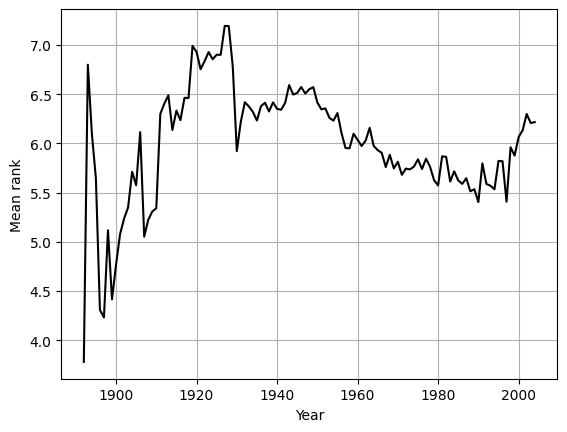

In [ ]:
def plot_line():
  grouped_data = combined_db.groupby('year')['rank'].mean()
  labels = grouped_data.keys()
  x = labels
  y = grouped_data
  plt.plot(x,y, color='black')
  plt.xlabel('Year')
  plt.ylabel("Mean rank")
  plt.grid()
  plt.show()
plot_line()

## Interpret and Visualise


---



<img src="https://drive.google.com/uc?id=1gFNYEpS7qFx6L7REpM_5inB6zwxyEuQ7">



<img src="https://drive.google.com/uc?id=10fFK-WX9hlYnKo6Lxa5y5077VN5cgAxS">



<img src="https://drive.google.com/uc?id=1rsCyUyKSruoqyfoeGw5QMNS8yoDbuPK7">

<img src="https://drive.google.com/uc?id=1ZGqhyKRVu1YIoSuUMRBtfkpZGgVHTGUx">


<img src="https://drive.google.com/uc?id=1NTBCGESPrDPOLZdUWWAW5yo3Hpd7YiFH">


## Tell the Story



---



#Key findings

**Directors:**
The number of directors releasing films over the course of a year has increased over time from under 100 until 1913 up to a peak of 4846 in 2002. This likely reflects improvements in technology and the growth of the film industry leading to film making becoming a more accessible art form.

**Genres:** We can see the number of different genres increasing over the time period covered by the dataset from only 5 in the early years to a consistent 19 from 1960 until the end. This reflects an increasing diversity in the types of film created which then plateaus. As noted, film noir entirely disappears from the dataset in 1960, perhaps this is unsurprising as it is a genre of film associated with a particular time period. Film noir also has the highest average ranking of all the genres but since it is not present in later years when ranking is lower overall, we should consider whether this is a fair comparison.

**Ranks:** The highest average rank of 7.19 was achieved in 1927 and 1928 and average ranks have not gone above 6.5 since 1946. Many things about the film industry and audience attitudes may have changed in that time that could have affected ranking. For instance, towards the end of the time period covered by the dataset many more films are made and they are watched in different settings. Therefore we can't conclude that films made in the 1920s are objectively 'better' than films made in the 1980s.

**High ranking movies:** In terms of genres, we can see at a glance that comedy, documentary and shorts are well represented in the graph of directors with an average rank of above 9. We can also see that there are 8 directors with the highest average rank, 9.90.

**Conclusions:** Although some interesting trends can be picked out of this dataset, it would be difficult to draw any firm conclusions as to the recipe for a high ranking movie. The dataset covers such a large time period, over which there has been huge technological and social change that it is hard to say that audiences would enjoy or expect the same things from a film. Further analysis could focus in on a much smaller time period, a decade for example. It would also be interesting to learn more about how the ranking data was collected. Were the films all ranked by contemporary audiences? The process of collecting opinions on films in the early 1900s would be very different to the process of the early 2000s.

## Evaluate the Process


---



#**Collecting the data:**
Initially I intended to upload the csv file directly from my hard drive, however this proved difficult and I realised I would have to add it again every time I work on the project. So I decided it would be better to use a GitHub url instead. I then had to make my GitHub repository public so that I could access the file.
#**Cleaning and transforming:**
Cleaning the data by removing rows with null values went well, this didn't seem too difficult. The feature extraction was more tricky because I wasn't sure how to combine columns. However I now feel more confident about doing this in future.
#**Summary Statistics**
I enjoy plotting charts in Python but I had some trouble with the bar chart, it was good to practice using groupby and really thinking about what I want my charts to show.

#**Interpret and Visualise**
I find Power BI a bit difficult to work with and not very intuitive. Something simple like renaming columns or axes seems more tricky than it should be. It also wasn't easy to embed the images in the notebook. I learned a lot through doing this though.